In [1]:
# Importaciones
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from geopy import distance

In [2]:
# Prueba de carga de datos

In [3]:
sv = pd.read_csv('pmed_2024/pmed_ubicacion_01-2024.csv', sep=';', quotechar='"')

In [4]:
print(sv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tipo_elem  4910 non-null   object 
 1   distrito   4905 non-null   float64
 2   id         4910 non-null   int64  
 3   cod_cent   4910 non-null   object 
 4   nombre     4897 non-null   object 
 5   utm_x      4910 non-null   float64
 6   utm_y      4910 non-null   float64
 7   longitud   4910 non-null   float64
 8   latitud    4910 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 345.4+ KB
None


In [5]:
print(sv.shape)

(4910, 9)


In [6]:
pmed_encabezados = ["tipo_elem","distrito","id","cod_cent","nombre","utm_x","utm_y","longitud","latitud"]

In [7]:
# Recorriendo archivos y creando los diccionarios

In [8]:
# Diccionarios
dicc_IdCod = {}
dicc_IdLatLon = {}

In [9]:
sufijo_archivos_datos = ["01-2024.csv", "02-2024.csv", "03-2024.csv", "04-2024.csv", "05-2024.csv", "06-2024.csv", "07-2024.csv", "08-2024.csv", "09-2024.csv", "10-2024.csv", "11-2024.csv", "12-2024.csv"]
sensorXmes = []
for sad in sufijo_archivos_datos:
    archivo = 'pmed_2024/pmed_ubicacion_' + sad
    df = pd.read_csv(archivo, sep=';', quotechar='"', encoding='latin-1')
    print(archivo, df.shape)
    filas = df.shape[0]
    conteosensores = 0
    for v in range(filas):
        data_id = df["id"][v]
        data_cod = df["cod_cent"][v]
        data_latlon = [df["longitud"][v],df["latitud"][v]]
        if data_cod[:2] == "PM":
            if data_id not in dicc_IdCod:
                dicc_IdCod[data_id] = data_cod
                dicc_IdLatLon[data_id] = [data_latlon]
                conteosensores += 1
                pr = sad + "\t" + str(data_id) + "\t" + str(data_cod) + "\t" + str(data_latlon[0])[:10] + "\t" + str(data_latlon[1])[:10] + "\t" + str(type(data_latlon[0]))
                print(pr)
    sensorXmes.append(conteosensores)

pmed_2024/pmed_ubicacion_01-2024.csv (4910, 9)
01-2024.csv	6640	PM10013	-3.6741153	40.4810095	<class 'numpy.float64'>
01-2024.csv	6641	PM10021	-3.6740765	40.4806959	<class 'numpy.float64'>
01-2024.csv	6642	PM10091	-3.6743945	40.4760379	<class 'numpy.float64'>
01-2024.csv	6643	PM10092	-3.6745793	40.4759797	<class 'numpy.float64'>
01-2024.csv	6644	PM10141	-3.6717572	40.4708744	<class 'numpy.float64'>
01-2024.csv	6645	PM10142	-3.6718426	40.4708340	<class 'numpy.float64'>
01-2024.csv	6646	PM10211	-3.6684298	40.4664557	<class 'numpy.float64'>
01-2024.csv	6647	PM10212	-3.6686381	40.4664143	<class 'numpy.float64'>
01-2024.csv	6648	PM10241	-3.6667503	40.4633612	<class 'numpy.float64'>
01-2024.csv	6649	PM10242	-3.6669821	40.4633238	<class 'numpy.float64'>
01-2024.csv	10297	PM10293	-3.6653767	40.4601917	<class 'numpy.float64'>
01-2024.csv	6650	PM10341	-3.6634205	40.4545233	<class 'numpy.float64'>
01-2024.csv	6651	PM10342	-3.6637176	40.4544163	<class 'numpy.float64'>
01-2024.csv	6652	PM10343	-3.6

In [11]:
for i in range(len(sufijo_archivos_datos)):
    print(sufijo_archivos_datos[i], sensorXmes[i], "sensores agregados.")

01-2024.csv 296 sensores agregados.
02-2024.csv 0 sensores agregados.
03-2024.csv 0 sensores agregados.
04-2024.csv 0 sensores agregados.
05-2024.csv 0 sensores agregados.
06-2024.csv 0 sensores agregados.
07-2024.csv 0 sensores agregados.
08-2024.csv 0 sensores agregados.
09-2024.csv 0 sensores agregados.
10-2024.csv 0 sensores agregados.
11-2024.csv 15 sensores agregados.
12-2024.csv 10 sensores agregados.


In [12]:
# Sólo se mantienen los sensores de enero para trabajar
# Los demás meses no agregan sensores nuevos y los datos
# de noviembre y diciembre no cumplen el 5% mínimo

# Reiniciando Diccionarios
dicc_IdCod = {}
dicc_IdLatLon = {}
# Procesando los datos de ENERO
archivo = 'pmed_2024/pmed_ubicacion_01-2024.csv'
df = pd.read_csv(archivo, sep=';', quotechar='"', encoding='latin-1')
filas = df.shape[0]
for v in range(filas):
    data_id = df["id"][v]
    data_cod = df["cod_cent"][v]
    data_latlon = [df["longitud"][v],df["latitud"][v]]
    if data_cod[:2] == "PM":
        if data_id not in dicc_IdCod:
            dicc_IdCod[data_id] = data_cod
            dicc_IdLatLon[data_id] = [data_latlon]

In [13]:
# Exportando los Ids de los sensores registrados para proceso de filtrado de las fuentes de datos (C++)
lista_Ids = list(dicc_IdCod.keys())
lista_Ids.sort()
nombrearchivo = "ids_sensores_2024.txt"
datafile = open(nombrearchivo,"w")
for li in lista_Ids:
    datafile.write(str(li) + "\n")
datafile.close()

In [14]:
# Procesa los archivos usando -exporta_sensores_m30.cpp- que recibe:
# - Nombre del archivo de entrada
# - Lista de ids (obtenidos en el paso anterior)
# - Nombre del archivo de salida


In [15]:
# Procesando los archivos para generar las grilla de datos

# 1- Obteniendo las fechas del conjunto de datos.
diasXmes = [31,29,31,30,31,30,31,31,30,31,30,31]
instantesXmes = 0
for i in diasXmes:
    instantesXmes += (i * 24 * 4)
print("Total de instantes en el año 2024:", instantesXmes)

lista_Fechas = []
prefijo = '~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_'
for sad in sufijo_archivos_datos:
    nombre_archivo = prefijo + sad
    print(nombre_archivo)
    df = pd.read_csv(nombre_archivo, sep=';', quotechar='"')
    filas = df.shape[0]
    for x in range(filas):
        f = df['fecha'][x]
        if f not in lista_Fechas:
            lista_Fechas.append(f)
print("Total de fechas encontradas entre los datos:", len(lista_Fechas))

Total de instantes en el año 2024: 35136
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_01-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_02-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_03-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_04-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_05-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_06-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_07-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_08-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_09-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_10-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_11-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30

In [16]:
# 2- Generando las grillas vacías

lista_Fechas.sort()
numFechas = len(lista_Fechas)
numSensores = len(lista_Ids)

dicc_posID = {}
for i in range(numSensores):
    dicc_posID[lista_Ids[i]] = i

dicc_posFecha = {}
for i in range(numFechas):
    dicc_posFecha[lista_Fechas[i]] = i

grillaIntensidad = np.full((numSensores, numFechas), -2)
grillaOcupacion = np.full((numSensores, numFechas), -2)
grillaCarga = np.full((numSensores, numFechas), -2)
grillaVelocidad = np.full((numSensores, numFechas), -2)

dicc_ID_mI = {}
dicc_ID_mO = {}
dicc_ID_mC = {}
dicc_ID_mV = {}

for sad in sufijo_archivos_datos:
    nombre_archivo = prefijo + sad
    print(nombre_archivo)
    df = pd.read_csv(nombre_archivo, sep=';', quotechar='"')
    filas = df.shape[0]
    for x in range(filas):
        s = df['id'][x]
        f = df['fecha'][x]
        ps = dicc_posID[s]
        pf = dicc_posFecha[f]
    
        if s not in dicc_ID_mI:
            dicc_ID_mI[s] = 0
            dicc_ID_mO[s] = 0
            dicc_ID_mC[s] = 0
            dicc_ID_mV[s] = 0
            
        if not math.isnan(df['intensidad'][x]):
            grillaIntensidad[ps][pf] = int(df['intensidad'][x])
            dicc_ID_mI[s] += 1
        else:
            grillaIntensidad[ps][pf] = -1
        
        if not math.isnan(df['ocupacion'][x]):
            grillaOcupacion[ps][pf] = int(df['ocupacion'][x])
            dicc_ID_mO[s] += 1
        else:
            grillaOcupacion[ps][pf] = -1
        
        if not math.isnan(df['carga'][x]):
            grillaCarga[ps][pf] = int(df['carga'][x])
            dicc_ID_mC[s] += 1
        else:
            grillaCarga[ps][pf] = -1
        
        if not math.isnan(df['vmed'][x]):
            grillaVelocidad[ps][pf] = int(df['vmed'][x])
            dicc_ID_mV[s] += 1
        else:
            grillaVelocidad[ps][pf] = -1


~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_01-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_02-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_03-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_04-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_05-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_06-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_07-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_08-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_09-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_10-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_11-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_12-2024.csv


In [17]:
# Mostrar las muestras recolectadas por sensor
print("id_sen\tintens\tocupa\tcarga\tvmed")

id_sen	intens	ocupa	carga	vmed


In [18]:
print("Sensores desde puntos de medida:", len(lista_Ids))
lista_Ids = list(dicc_ID_mI.keys())
lista_Ids.sort()
print("Sensores desde muestras de datos:", len(lista_Ids))
numSensores = len(lista_Ids)
for i in lista_Ids:
    s = ""
    if i in dicc_ID_mI:
        s = str(i) + "\t" + str(dicc_ID_mI[i]) + "\t" + str(dicc_ID_mO[i]) + "\t" + str(dicc_ID_mC[i]) + "\t" + str(dicc_ID_mV[i])
    else:
        s = str(i) + "\tsin datos"
    print(s)

Sensores desde puntos de medida: 296
Sensores desde muestras de datos: 291
3488	34883	34883	34883	34879
3489	35115	35115	35115	35026
3490	33872	33872	33872	33867
3491	34798	34798	34798	34790
3492	34658	34658	34658	34658
3493	35114	35114	35114	34911
3494	35117	35117	35117	35108
3495	35103	35103	35103	35094
3496	35117	35117	35117	34895
3510	173	173	173	76
3521	35058	35058	35058	35055
3531	35117	35117	35117	35117
3532	35088	35088	35088	35016
3533	35044	35044	35044	34994
3536	35117	35117	35117	35113
3538	35054	35054	35054	34857
3539	35115	35115	35115	34979
3558	35117	35117	35117	35096
3559	34990	34990	34990	34861
3560	35116	35116	35116	35115
3561	34786	34786	34786	34246
3597	35117	35117	35117	35117
3598	35117	35117	35117	35117
3599	35117	35117	35117	35117
3600	35117	35117	35117	35117
3611	35036	35036	35036	35030
3703	35115	35115	35115	35109
3704	35115	35115	35115	35115
3705	35100	35100	35100	35100
3706	35116	35116	35116	35036
3761	35117	35117	35117	35090
3762	35117	35117	35117	35053
3763	3

In [19]:
# Mostrar sensores que poseen menos del 5% de muestras:
cincoxciento = int(numFechas * 5 / 100)
print("Total de muestras:", numFechas)
print("5% de muestras:", cincoxciento)
lista_Ids_validos = []
for ids in lista_Ids:
    minimos = [numFechas-dicc_ID_mI[ids], numFechas-dicc_ID_mO[ids], numFechas-dicc_ID_mC[ids], numFechas-dicc_ID_mV[ids]]
    menor = min(minimos)
    if menor > cincoxciento:
        print("sensor", ids, "no cumple con valor mínimo de muestras:", minimos)
    else:
        lista_Ids_validos.append(ids)
print("Total sensores antes filtro:", len(lista_Ids))
print("Total sensores después filtro:", len(lista_Ids_validos))

Total de muestras: 35117
5% de muestras: 1755
sensor 3510 no cumple con valor mínimo de muestras: [34944, 34944, 34944, 35041]
sensor 3815 no cumple con valor mínimo de muestras: [5915, 5915, 5915, 5939]
sensor 3818 no cumple con valor mínimo de muestras: [1991, 1991, 1991, 2460]
sensor 3820 no cumple con valor mínimo de muestras: [2179, 2179, 2179, 2598]
sensor 6639 no cumple con valor mínimo de muestras: [1932, 1932, 1932, 1932]
sensor 6646 no cumple con valor mínimo de muestras: [5948, 5948, 5948, 5995]
sensor 6663 no cumple con valor mínimo de muestras: [1980, 1980, 1980, 1997]
sensor 6664 no cumple con valor mínimo de muestras: [4020, 4020, 4020, 4485]
sensor 6665 no cumple con valor mínimo de muestras: [4032, 4032, 4032, 4032]
sensor 6676 no cumple con valor mínimo de muestras: [2177, 2177, 2177, 2206]
sensor 6690 no cumple con valor mínimo de muestras: [2598, 2598, 2598, 2604]
sensor 6692 no cumple con valor mínimo de muestras: [3316, 3316, 3316, 3335]
sensor 6696 no cumple con 

In [20]:
# Función para la corrección de valores
def corrigeDatos(lista):
    limite = len(lista)
    indice = 0
    vPrev = 0
    if lista[0] < 0:
        lista[0] = 0
        indice += 1
    if lista[-1] < 0:
        lista[-1] = 0
    while indice < limite :
        if lista[indice] >= 0:
            vPrev = lista[indice]
            indice += 1
        else:
            desde = indice
            hasta = indice+1
            while (indice < limite) and (lista[indice] < 0):
                indice += 1
                hasta = indice
            cant = int(hasta - desde)
            vProx = 0
            if hasta < limite:
                vProx = lista[hasta]
            delta = float(vProx - vPrev) / (cant + 1)
            floatPrve = float(vPrev)
            for i in range(desde, hasta):
                lista[i] = int(vPrev + delta)
                vPrev += delta
    return lista

In [21]:
def esFija(identi):
    fija = True
    posi = dicc_posID[identi]
    for i in range(1, len(grillaIntensidad[posi])):
        if grillaIntensidad[posi][i] != grillaIntensidad[posi][i-1]:
            fija = False
    if fija:
        print("Lista", identi, "es fija:",grillaIntensidad[posi])
        return True
    fija = True
    for i in range(1, len(grillaCarga[posi])):
        if grillaCarga[posi][i] != grillaCarga[posi][i-1]:
            fija = False
    if fija:
        print("Lista", identi, "es fija:",grillaCarga[posi])
        return True
    fija = True
    for i in range(1, len(grillaOcupacion[posi])):
        if grillaOcupacion[posi][i] != grillaOcupacion[posi][i-1]:
            fija = False
    if fija:
        print("Lista", identi, "es fija:",grillaOcupacion[posi])
        return True
    fija = True
    for i in range(1, len(grillaVelocidad[posi])):
        if grillaVelocidad[posi][i] != grillaVelocidad[posi][i-1]:
            fija = False
    if fija:
        print("Lista", identi, "es fija:",grillaVelocidad[posi])
        return True
    return False

In [22]:
ids_PM_TI = []
ids_PM_LI = []
ids_PM_TE = []
ids_PM_LE = []
ids_PM_nn = []
list_Cods_validos = []
dicc_CodId = {}

for idt in lista_Ids_validos:
    cod = dicc_IdCod[idt]
    list_Cods_validos.append(cod)
    dicc_CodId[cod] = idt
list_Cods_validos.sort()

list_IDs_final = []
list_Cods_final = []

for cod in list_Cods_validos:
    idt = dicc_CodId[cod]
    if not esFija(idt):
        if cod[2] == '1':
            # Interior
            if cod[6] == '1':
                # Troncal
                ids_PM_TI.append(idt)
            elif cod[6] == '2':
                # Lateral
                ids_PM_LI.append(idt)
            else:
                ids_PM_nn.append(idt)
        elif cod[2] == '2':
            # Exterior
            if cod[6] == '1':
                # Troncal
                ids_PM_TE.append(idt)
            elif cod[6] == '2':
                # Lateral
                ids_PM_LE.append(idt)
            else:
                ids_PM_nn.append(idt)
        else:
            ids_PM_nn.append(idt)
        ps = dicc_posID[idt]
        corrigeDatos(grillaIntensidad[ps])
        corrigeDatos(grillaOcupacion[ps])
        corrigeDatos(grillaCarga[ps])
        corrigeDatos(grillaVelocidad[ps])
        list_Cods_final.append(cod)
        list_IDs_final.append(idt)        

print("listCodsSensValidos:", len(list_Cods_final), "elementos")
print("list TI:", len(ids_PM_TI), "elementos")
print("list LI:", len(ids_PM_LI), "elementos")
print("list TE:", len(ids_PM_TE), "elementos")
print("list LE:", len(ids_PM_LE), "elementos")
print("list nn:", len(ids_PM_nn), "elementos")
suma = len(ids_PM_TI) + len(ids_PM_LI) + len(ids_PM_TE) + len(ids_PM_LE) + len(ids_PM_nn)
print("Total:", suma)

Lista 6656 es fija: [0 0 0 ... 0 0 0]
Lista 6657 es fija: [0 0 0 ... 0 0 0]
Lista 6659 es fija: [0 0 0 ... 0 0 0]
Lista 6660 es fija: [0 0 0 ... 0 0 0]
Lista 6658 es fija: [0 0 0 ... 0 0 0]
Lista 10264 es fija: [0 0 0 ... 0 0 0]
Lista 6702 es fija: [0 0 0 ... 0 0 0]
listCodsSensValidos: 241 elementos
list TI: 28 elementos
list LI: 23 elementos
list TE: 35 elementos
list LE: 18 elementos
list nn: 137 elementos
Total: 241


In [23]:
# Exportando datos
ids_PM_full = [ids_PM_TI, ids_PM_LI, ids_PM_TE, ids_PM_LE, ids_PM_nn]
# Archivo de los datos
nombrearchivo = "m30_2024_data.txt"
datafile = open(nombrearchivo ,"w")
datafile.write(str(suma)+" "+str(numFechas)+"\n")
for ids in ids_PM_full:
    for s in ids:
        datafile.write(str(s)+" ")
datafile.write("\n")
for ids in ids_PM_full:
    for s in ids:
        pos = dicc_posID[s]
        for c in range(numFechas):
            datafile.write(str(int(grillaIntensidad[pos][c]))+" ")
        datafile.write("\n")
        for c in range(numFechas):
            datafile.write(str(int(grillaOcupacion[pos][c]))+" ")
        datafile.write("\n")
        for c in range(numFechas):
            datafile.write(str(int(grillaCarga[pos][c]))+" ")
        datafile.write("\n")
        for c in range(numFechas):
            datafile.write(str(int(grillaVelocidad[pos][c]))+" ")
        datafile.write("\n")
datafile.close()
print("Archivo", nombrearchivo, "escrito correctamente.")

Archivo m30_2024_data.txt escrito correctamente.


In [24]:
# Archivo para la construcción de la estructura
nombrearchivo = "m30_2024_ids_estructura.txt"
archivo = open(nombrearchivo,"w")
for ids in ids_PM_full:
    archivo.write(str(len(ids))+" ")
archivo.write("\n")
for ids in ids_PM_full:
    for ide in ids:
        archivo.write(str(ide)+" ")
    archivo.write("\n")
archivo.close()
print("Archivo", nombrearchivo, "escrito correctamente.")

Archivo m30_2024_ids_estructura.txt escrito correctamente.


In [25]:
# Archivo de lista de vecindad
nombrearchivo = "m30_2024_listaVecindad.txt"
archivo = open(nombrearchivo,"w")
archivo.write(str(len(list_Cods_final)) + "\n")
for ids in ids_PM_full:
    for ide in ids:
        archivo.write(str(ide)+" ")
archivo.write("\n")
for ids in ids_PM_full:
    tope = len(ids)
    for i in range(tope):
        archivo.write(str(ids[i]) + " 1 " + str(ids[i-1]) + "\n")
archivo.close()
print("Archivo", nombrearchivo, "escrito correctamente.")

Archivo m30_2024_listaVecindad.txt escrito correctamente.


In [26]:
# Archivo de lista de vecindad
nombrearchivo = "m30_2024_listaVecindad_4de5.txt"
archivo = open(nombrearchivo,"w")
archivo.write(str(len(list_Cods_final)-len(ids_PM_full[-1])) + "\n")
for i in range(len(ids_PM_full)-1):
    for ide in ids_PM_full[i]:
        archivo.write(str(ide)+" ")
archivo.write("\n")
for i in range(len(ids_PM_full)-1):
    tope = len(ids_PM_full[i])
    for j in range(tope):
        archivo.write(str(ids_PM_full[i][j]) + " 1 " + str(ids_PM_full[i][j-1]) + "\n")
archivo.close()
print("Archivo", nombrearchivo, "escrito correctamente.")

Archivo m30_2024_listaVecindad_4de5.txt escrito correctamente.


In [27]:
for idpmf in ids_PM_full:
    for ids in idpmf:
        cod = dicc_IdCod[ids]
        print(ids, cod)

6641 PM10021
6642 PM10091
6644 PM10141
6648 PM10241
6650 PM10341
6654 PM10401
10175 PM10471
3799 PM10611
6666 PM10711
3491 PM10861
3816 PM10901
6672 PM10941
6679 PM11071
6680 PM11101
6683 PM11161
6685 PM11201
6687 PM11301
6689 PM11981
6691 PM12121
6693 PM12241
6694 PM12331
6695 PM12391
6698 PM12571
6699 PM12641
6700 PM12721
3801 PM12781
6706 PM13041
7013 PM13221
6643 PM10092
6645 PM10142
6647 PM10212
6649 PM10242
6651 PM10342
6655 PM10402
10265 PM10472
3819 PM10502
3800 PM10612
3488 PM10712
3490 PM10832
3492 PM10862
6670 PM10902
6673 PM10942
6677 PM10982
6681 PM11102
7125 PM12122
6813 PM12342
10180 PM12502
6815 PM12572
6817 PM12622
7130 PM13212
7014 PM13222
6713 PM20021
3823 PM20041
6715 PM20151
6717 PM20231
6720 PM20261
6722 PM20321
6725 PM20411
6729 PM20471
6732 PM20571
6734 PM20661
6737 PM20721
6743 PM20831
6746 PM20851
6749 PM20911
6753 PM20971
6758 PM21181
6763 PM21231
6765 PM21301
3532 PM21941
3533 PM22081
6766 PM22121
6768 PM22241
3836 PM22341
3558 PM22391
6769 PM22471
3597 PM22

In [28]:
# Resultados para Construcción de la estructura

In [29]:
def exportarArchivoVecinos(diccVecinos, nombrearchivo):
    neigborfile = open(nombrearchivo,"w")
    neigborfile.write(str(len(diccVecinos))+"\n")
    for s in diccVecinos:
        neigborfile.write(str(s)+" ")
    neigborfile.write("\n")
    for s in diccVecinos:
        neigborfile.write(str(s) + " ")
        vec = diccVecinos[s]
        neigborfile.write(str(len(vec)))
        for v in vec:
            neigborfile.write(" " + str(v))
        neigborfile.write("\n")
    neigborfile.close()
    print("Archivo", nombrearchivo, "escrito correctamente.")

In [30]:
# Generando listas de vecinos por distancia
cantSensFinal = len(list_IDs_final)
matrizDistancia = np.zeros((cantSensFinal, cantSensFinal))
for x in range(cantSensFinal):
    cooX = dicc_IdLatLon[list_IDs_final[x]][0]
    for y in range(x):
        cooY = dicc_IdLatLon[list_IDs_final[y]][0]
        dKm = distance.distance(cooX, cooY).km
        matrizDistancia[x][y] = dKm
        matrizDistancia[y][x] = dKm

def generaVecinosPorDistancia(diccionario, distancia, filename):
    for x in range(cantSensFinal):
        for y in range(cantSensFinal):
            if matrizDistancia[x][y] > 0 and matrizDistancia[x][y] <= distancia:
                idX = list_IDs_final[x]
                idY = list_IDs_final[y]
                if idX in diccionario:
                    diccionario[idX].append(idY)
                else:
                    diccionario[idX] = [idY]
    print("Sensores con vecinos a los", distancia, "km:", len(diccionario))
    exportarArchivoVecinos(diccionario, filename)

diccVec500m = {}
diccVec250m = {}
diccVec200m = {}
diccVec150m = {}
diccVec100m = {}
diccVec050m = {}
diccVec025m = {}
generaVecinosPorDistancia(diccVec500m, 0.500, "m30_2024_listaVecindad_dist_500m.txt")
generaVecinosPorDistancia(diccVec250m, 0.250, "m30_2024_listaVecindad_dist_250m.txt")
generaVecinosPorDistancia(diccVec200m, 0.200, "m30_2024_listaVecindad_dist_200m.txt")
generaVecinosPorDistancia(diccVec150m, 0.150, "m30_2024_listaVecindad_dist_150m.txt")
generaVecinosPorDistancia(diccVec100m, 0.100, "m30_2024_listaVecindad_dist_100m.txt")
generaVecinosPorDistancia(diccVec050m, 0.050, "m30_2024_listaVecindad_dist_050m.txt")
generaVecinosPorDistancia(diccVec025m, 0.025, "m30_2024_listaVecindad_dist_025m.txt")

Sensores con vecinos a los 0.5 km: 233
Archivo m30_2024_listaVecindad_dist_500m.txt escrito correctamente.
Sensores con vecinos a los 0.25 km: 224
Archivo m30_2024_listaVecindad_dist_250m.txt escrito correctamente.
Sensores con vecinos a los 0.2 km: 221
Archivo m30_2024_listaVecindad_dist_200m.txt escrito correctamente.
Sensores con vecinos a los 0.15 km: 215
Archivo m30_2024_listaVecindad_dist_150m.txt escrito correctamente.
Sensores con vecinos a los 0.1 km: 205
Archivo m30_2024_listaVecindad_dist_100m.txt escrito correctamente.
Sensores con vecinos a los 0.05 km: 194
Archivo m30_2024_listaVecindad_dist_050m.txt escrito correctamente.
Sensores con vecinos a los 0.025 km: 172
Archivo m30_2024_listaVecindad_dist_025m.txt escrito correctamente.


In [31]:
# Graficando la cantidad de vecinos en sensores por distancia

dist500m = np.zeros(cantSensFinal)
dist250m = np.zeros(cantSensFinal)
dist200m = np.zeros(cantSensFinal)
dist150m = np.zeros(cantSensFinal)
dist100m = np.zeros(cantSensFinal)
dist050m = np.zeros(cantSensFinal)
dist025m = np.zeros(cantSensFinal)

for x in range(cantSensFinal):
    idf = list_IDs_final[x]
    if idf in diccVec500m:
        dist500m[x] = len(diccVec500m[idf])
    if idf in diccVec250m:
        dist250m[x] = len(diccVec250m[idf])
    if idf in diccVec200m:
        dist200m[x] = len(diccVec200m[idf])
    if idf in diccVec150m:
        dist150m[x] = len(diccVec150m[idf])
    if idf in diccVec100m:
        dist100m[x] = len(diccVec100m[idf])
    if idf in diccVec050m:
        dist050m[x] = len(diccVec050m[idf])
    if idf in diccVec025m:
        dist025m[x] = len(diccVec025m[idf])

dist500m.sort()
dist250m.sort()
dist200m.sort()
dist150m.sort()
dist100m.sort()
dist050m.sort()
dist025m.sort()

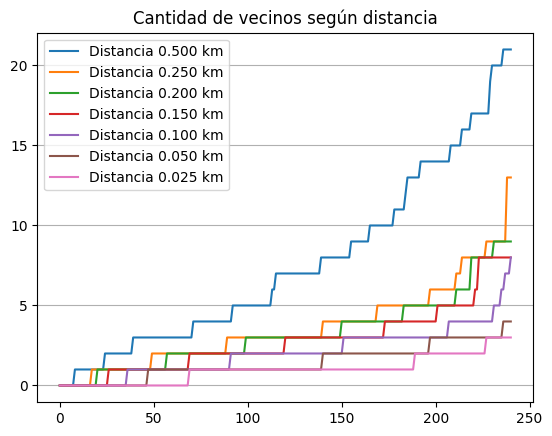

In [32]:
plt.plot(dist500m, label='Distancia 0.500 km')
plt.plot(dist250m, label='Distancia 0.250 km')
plt.plot(dist200m, label='Distancia 0.200 km')
plt.plot(dist150m, label='Distancia 0.150 km')
plt.plot(dist100m, label='Distancia 0.100 km')
plt.plot(dist050m, label='Distancia 0.050 km')
plt.plot(dist025m, label='Distancia 0.025 km')
plt.title("Cantidad de vecinos según distancia")
plt.savefig('histograma_2024_vecinos_x_distancia.png', bbox_inches='tight')
plt.grid(axis='y')
#plt.yscale('log')
plt.legend()
plt.show()
plt.close()

In [33]:
for i in range(10):
    print(lista_Fechas[i])

2024-01-01 00:00:00
2024-01-01 00:15:00
2024-01-01 00:30:00
2024-01-01 00:45:00
2024-01-01 01:00:00
2024-01-01 01:15:00
2024-01-01 01:30:00
2024-01-01 01:45:00
2024-01-01 02:00:00
2024-01-01 02:15:00


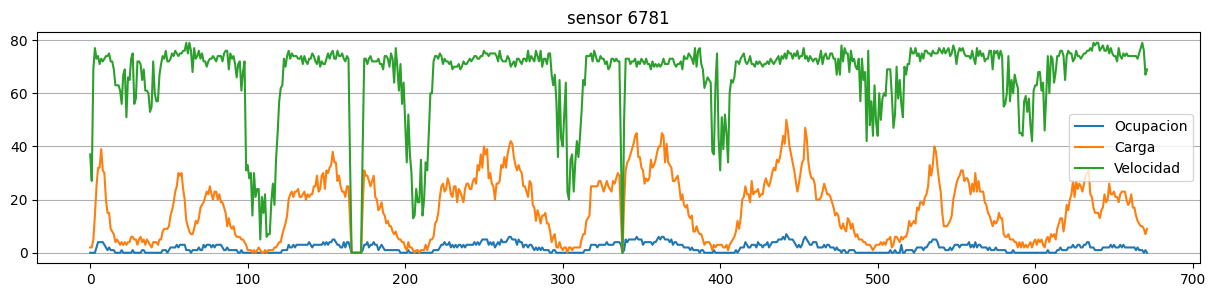

In [34]:
posfSensor = 175
numDias = 7
ids = list_IDs_final[posfSensor]
postoplot = dicc_posID[ids]
totalsegmentos = numDias * 24 * 4
plt.figure(figsize=(15,3))
#plt.plot(grillaIntensidad[postoplot][:totalsegmentos], label="Intensidad")
plt.plot(grillaOcupacion[postoplot][:totalsegmentos], label="Ocupacion")
plt.plot(grillaCarga[postoplot][:totalsegmentos], label="Carga")
plt.plot(grillaVelocidad[postoplot][:totalsegmentos], label="Velocidad")
plt.title('sensor '+str(ids))
#plt.savefig('histograma_2024_vecinos_x_distancia.png', bbox_inches='tight')
plt.grid(axis='y')
#plt.yscale('log')
plt.legend()
plt.show()
plt.close()

In [35]:
def graficaMetodoSeriePromedio(grillaDatos, listaIDs, nombre, cantDatos):
    # Muestra de serie promedio de un conjunto
    print(len(listaIDs), "series en el grupo "+nombre)
    idsInicial = listaIDs[0]
    idsMedio = listaIDs[int(len(listaIDs)/2)]
    idsFinal = listaIDs[-1]
    print(idsInicial, idsMedio, idsFinal)
    grillaDatos.shape[1]
    prom = np.zeros(grillaDatos.shape[1])
    for s in listaIDs:
        sPos = dicc_posID[s]
        prom = prom + grillaDatos[sPos]
    prom = prom / int(len(listaIDs))
    posInicial = dicc_posID[idsInicial]
    print("sInicial:", grillaDatos[posInicial][:10])
    posMedio = dicc_posID[idsMedio]
    print("sMedio:", grillaDatos[posMedio][:10])
    posFinal = dicc_posID[idsFinal]
    print("sFinal:", grillaDatos[posFinal][:10])
    print("sProm:", prom[:10])
    
    # Graficando
    plt.figure(figsize=(15,3))
    #plt.plot(grillaIntensidad[postoplot][:totalsegmentos], label="Intensidad")
    plt.plot(grillaDatos[posInicial][:cantDatos], label="Inicial")
    plt.plot(grillaDatos[posMedio][:cantDatos], label="Medio")
    plt.plot(grillaDatos[posFinal][:cantDatos], label="Final")
    plt.plot(prom[:cantDatos], label="Promedio")
    plt.title(nombre)
    #plt.savefig('histograma_2024_vecinos_x_distancia.png', bbox_inches='tight')
    plt.grid(axis='y')
    #plt.yscale('log')
    plt.legend()
    plt.show()
    plt.close()

28 series en el grupo Intensidad TI
6641 6683 7013
sInicial: [ 190  156  912 1784 2981 3240 3192 3169 2668 2488]
sMedio: [ 480  435 1356 2531 3412 3820 4020 3884 3144 3276]
sFinal: [ 80 132 116 232 221 216 280 276 216 272]
sProm: [ 200.96428571  181.14285714  754.28571429 1583.07142857 2271.28571429
 2600.78571429 2751.67857143 2678.07142857 2480.39285714 2268.39285714]


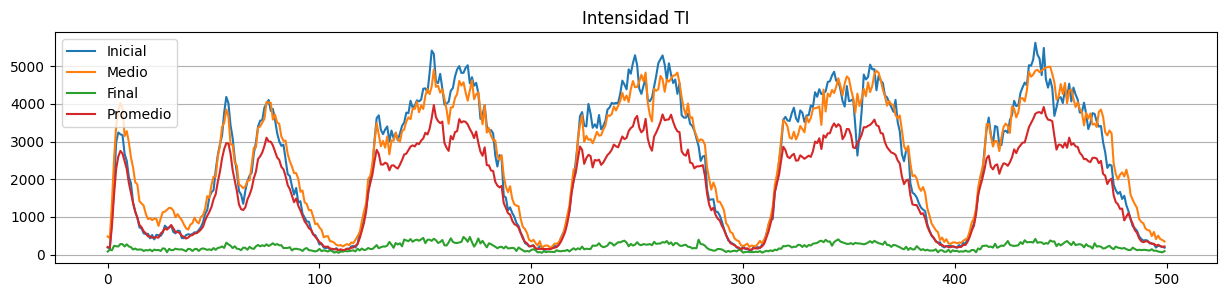

28 series en el grupo Ocupacion TI
6641 6683 7013
sInicial: [0 0 1 3 7 9 9 8 7 6]
sMedio: [ 1  1  1  5  7  8  9 10  6  8]
sFinal: [1 1 0 3 5 6 6 7 8 7]
sProm: [0.39285714 0.46428571 0.78571429 2.92857143 5.17857143 6.35714286
 7.07142857 6.78571429 6.71428571 6.10714286]


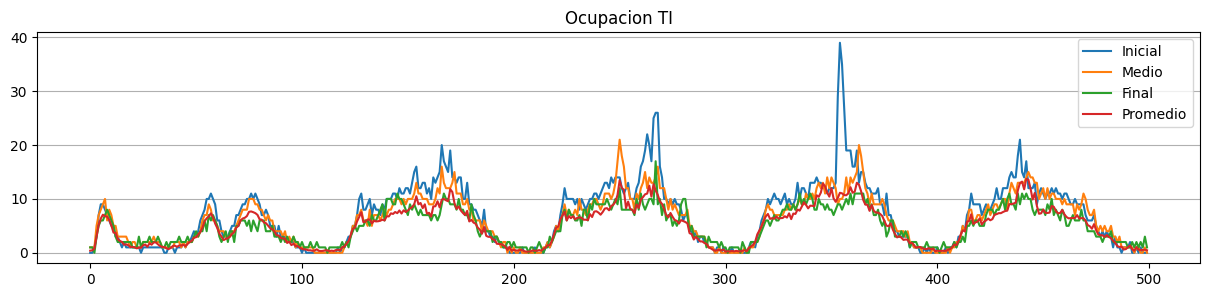

28 series en el grupo Carga TI
6641 6683 7013
sInicial: [ 3  2 18 35 54 60 59 58 50 47]
sMedio: [11 10 30 53 70 78 81 79 65 68]
sFinal: [ 5  8  9 18 17 17 21 20 17 22]
sProm: [ 4.53571429  4.32142857 15.57142857 32.53571429 45.17857143 51.92857143
 54.78571429 53.35714286 49.42857143 45.96428571]


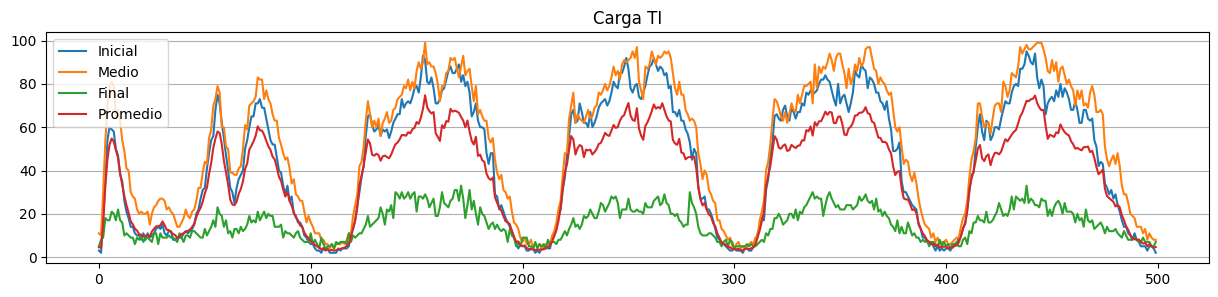

28 series en el grupo Velocidad TI
6641 6683 7013
sInicial: [80 75 93 88 85 83 82 82 85 85]
sMedio: [97 94 90 86 82 78 78 78 81 84]
sFinal: [35 32 32 50 61 61 58 61 58 57]
sProm: [81.71428571 71.10714286 86.42857143 86.92857143 84.25       82.67857143
 81.32142857 81.42857143 81.14285714 82.67857143]


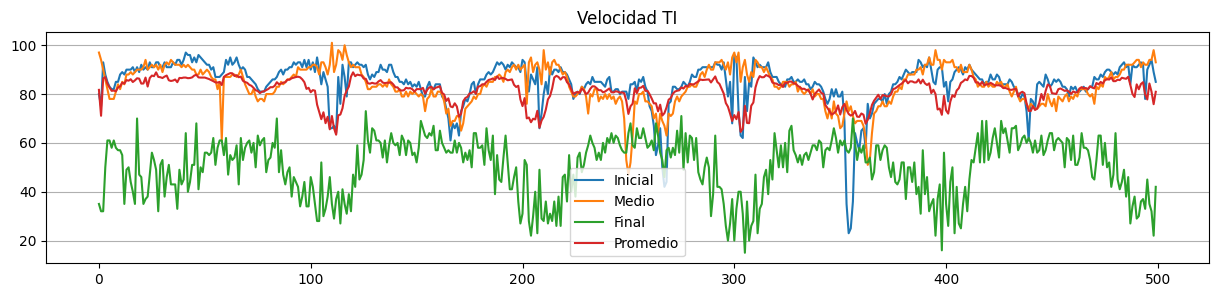

23 series en el grupo Intensidad LI
6643 3492 7014
sInicial: [ 21  32  97 219 380 532 537 592 492 371]
sMedio: [ 320  312 1104 2144 3056 3388 2988 1988 1836 2392]
sFinal: [ 32  16  96 229 408 444 436 579 440 388]
sProm: [ 158.82608696  136.26086957  629.30434783 1267.04347826 1840.26086957
 2162.69565217 2218.17391304 1962.91304348 1813.95652174 1784.60869565]


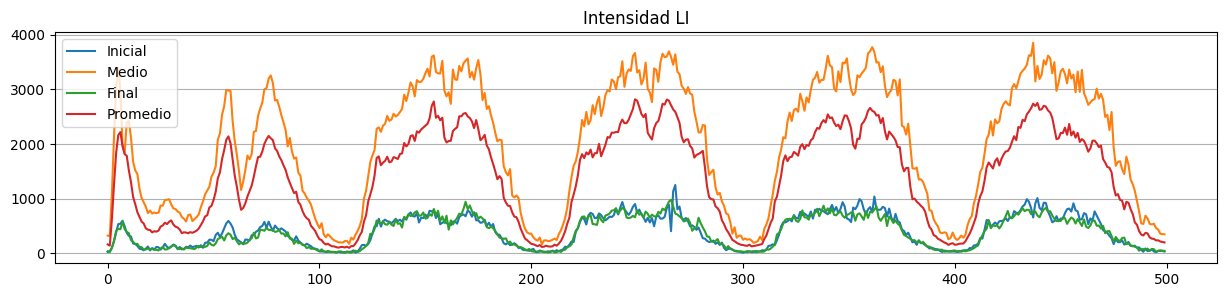

23 series en el grupo Ocupacion LI
6643 3492 7014
sInicial: [0 0 0 0 1 1 2 2 2 1]
sMedio: [0 0 1 5 8 9 8 6 3 6]
sFinal: [0 0 0 1 2 5 4 5 3 3]
sProm: [0.08695652 0.         0.43478261 2.56521739 4.65217391 6.26086957
 6.69565217 7.56521739 6.39130435 5.2173913 ]


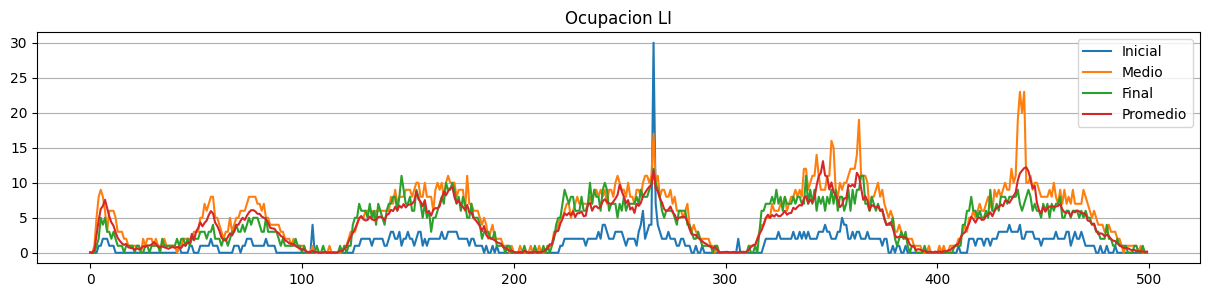

23 series en el grupo Carga LI
6643 3492 7014
sInicial: [ 2  1  3  7 11 16 16 18 15 12]
sMedio: [ 9  9 30 58 81 90 80 54 50 63]
sFinal: [ 3  1  7 13 26 27 26 35 27 24]
sProm: [ 4.43478261  3.7826087  16.30434783 32.73913043 47.56521739 54.95652174
 56.7826087  51.91304348 47.39130435 46.43478261]


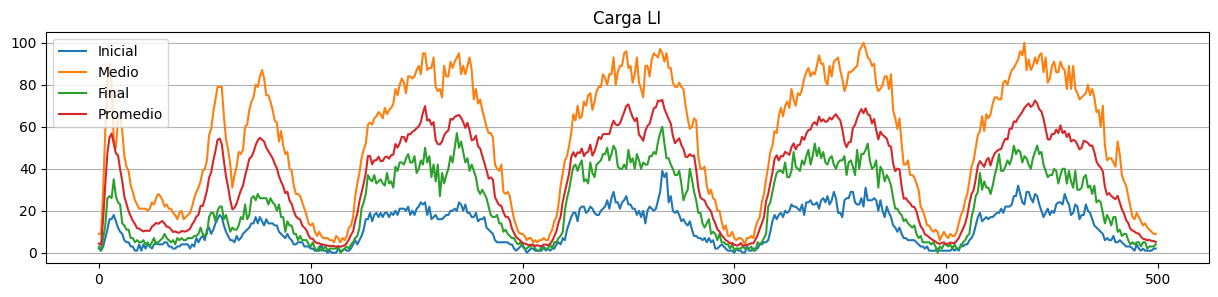

23 series en el grupo Velocidad LI
6643 3492 7014
sInicial: [20 40 49 71 78 77 77 79 76 77]
sMedio: [89 87 84 79 74 66 70 71 72 70]
sFinal: [34 20 50 72 67 65 67 63 66 65]
sProm: [62.43478261 58.86956522 75.2173913  77.08695652 74.56521739 71.86956522
 70.47826087 67.7826087  68.69565217 72.34782609]


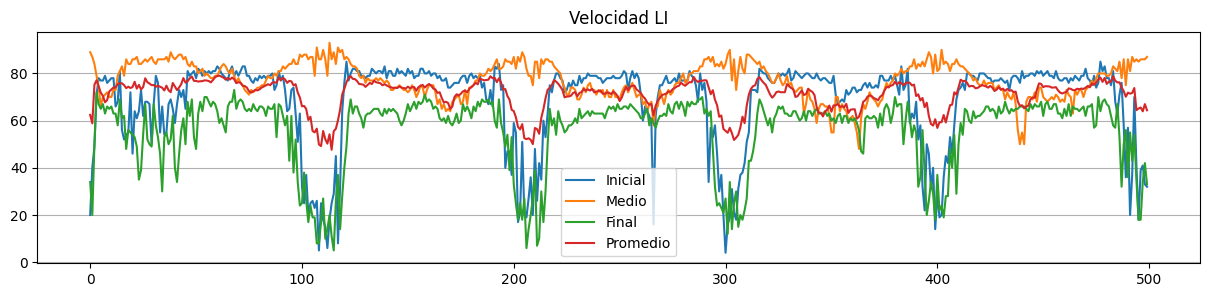

35 series en el grupo Intensidad TE
6713 6765 6934
sInicial: [ 117  109  637 1424 2164 2353 2644 2580 2504 2004]
sMedio: [ 336  220  973 1724 2432 2376 2528 2644 2385 2252]
sFinal: [ 140   64  296  896 1232 1360 1549 1452 1440 1188]
sProm: [ 163.48571429  151.54285714  708.85714286 1577.85714286 2178.42857143
 2517.11428571 2687.17142857 2621.88571429 2444.88571429 2039.51428571]


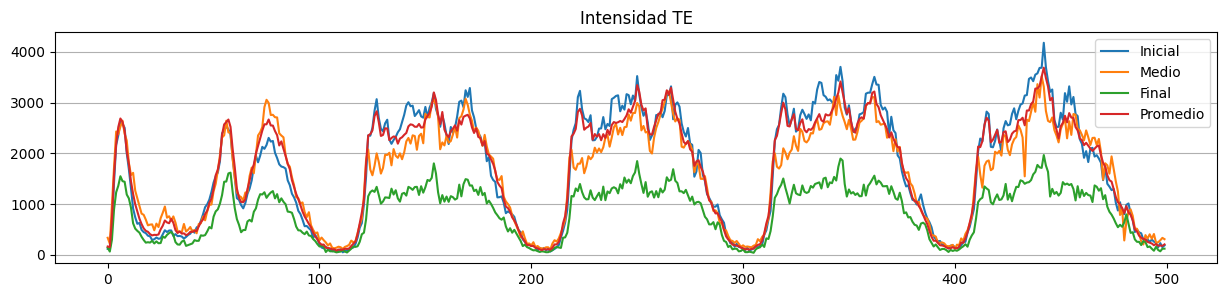

35 series en el grupo Ocupacion TE
6713 6765 6934
sInicial: [0 0 0 1 2 3 4 4 5 3]
sMedio: [0 0 1 3 5 5 5 5 5 6]
sFinal: [0 0 0 3 5 5 8 8 7 5]
sProm: [0.34285714 0.31428571 0.48571429 2.82857143 4.54285714 5.94285714
 6.4        6.77142857 6.42857143 4.94285714]


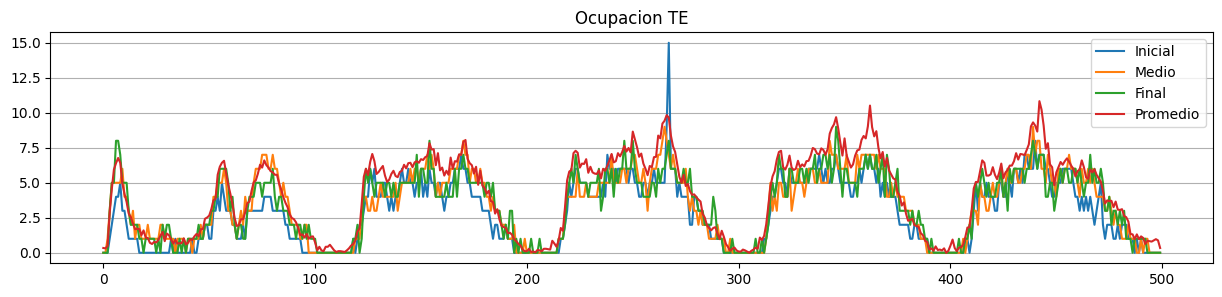

35 series en el grupo Carga TE
6713 6765 6934
sInicial: [ 2  2 14 27 43 46 52 50 49 39]
sMedio: [ 8  4 19 35 48 47 48 52 47 44]
sFinal: [ 4  2  9 27 38 42 46 43 44 36]
sProm: [ 3.85714286  3.08571429 14.57142857 32.45714286 44.2        50.74285714
 53.8        52.57142857 49.54285714 41.54285714]


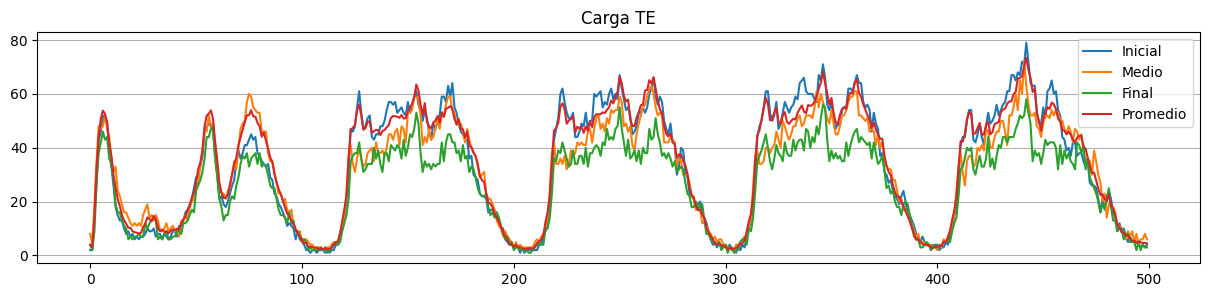

35 series en el grupo Velocidad TE
6713 6765 6934
sInicial: [96 87 98 97 93 94 91 92 90 92]
sMedio: [85 85 85 83 81 81 80 79 81 79]
sFinal: [70 50 62 66 63 63 62 61 61 62]
sProm: [74.88571429 72.6        86.62857143 84.31428571 81.45714286 79.8
 79.22857143 78.48571429 78.62857143 80.45714286]


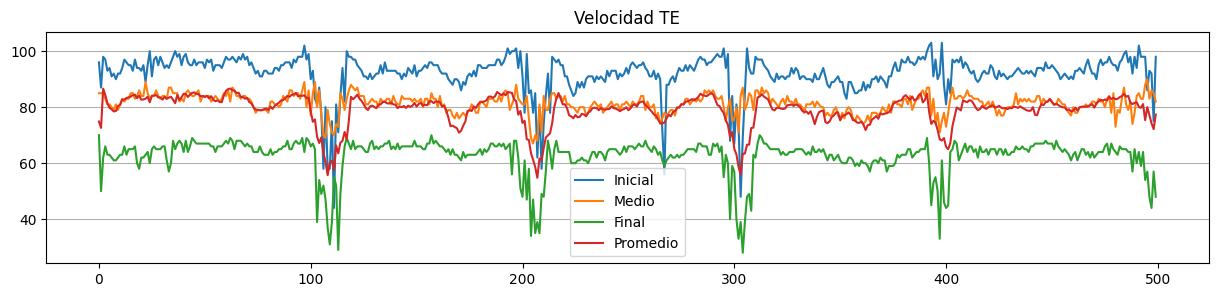

18 series en el grupo Intensidad LE
6714 6750 6935
sInicial: [  60   60  376  749 1148 1240 1440 1503 1196 1032]
sMedio: [ 313  240  924 1824 2452 2576 2621 2276 2164 2260]
sFinal: [ 20  20 189 428 536 800 904 932 751 672]
sProm: [ 170.22222222  137.11111111  641.22222222 1248.77777778 1659.27777778
 1838.55555556 1940.11111111 1863.05555556 1708.11111111 1629.83333333]


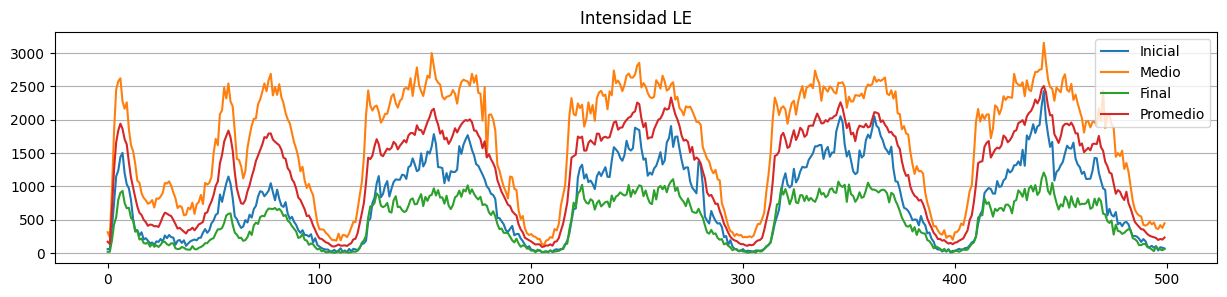

18 series en el grupo Ocupacion LE
6714 6750 6935
sInicial: [0 0 0 1 4 5 5 6 4 5]
sMedio: [ 1  0  2  6  8 10 10 10  9 10]
sFinal: [0 0 0 2 4 6 7 9 6 6]
sProm: [0.44444444 0.05555556 0.77777778 3.61111111 5.44444444 6.61111111
 7.38888889 7.61111111 6.55555556 6.61111111]


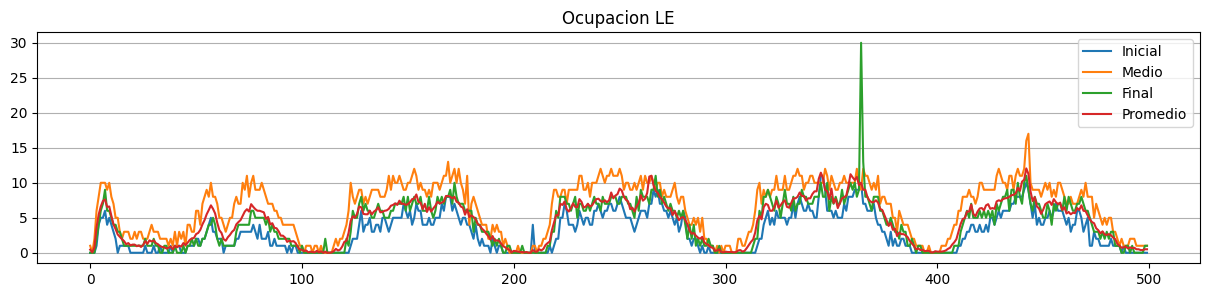

18 series en el grupo Carga LE
6714 6750 6935
sInicial: [ 3  2 15 30 45 50 56 59 47 41]
sMedio: [10  8 30 57 76 80 81 71 68 72]
sFinal: [ 2  2 13 27 36 54 59 61 50 43]
sProm: [ 5.61111111  4.38888889 20.22222222 38.88888889 51.72222222 57.38888889
 60.33333333 58.94444444 53.11111111 51.27777778]


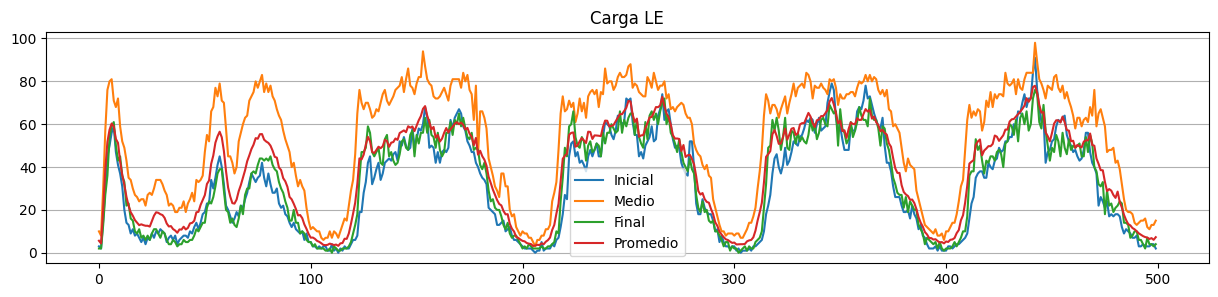

18 series en el grupo Velocidad LE
6714 6750 6935
sInicial: [56 35 71 75 73 72 70 69 70 72]
sMedio: [89 74 88 78 75 75 70 71 74 73]
sFinal: [19 12 66 67 64 64 62 59 63 63]
sProm: [65.61111111 61.38888889 79.16666667 76.16666667 74.44444444 72.11111111
 70.55555556 70.55555556 71.22222222 72.38888889]


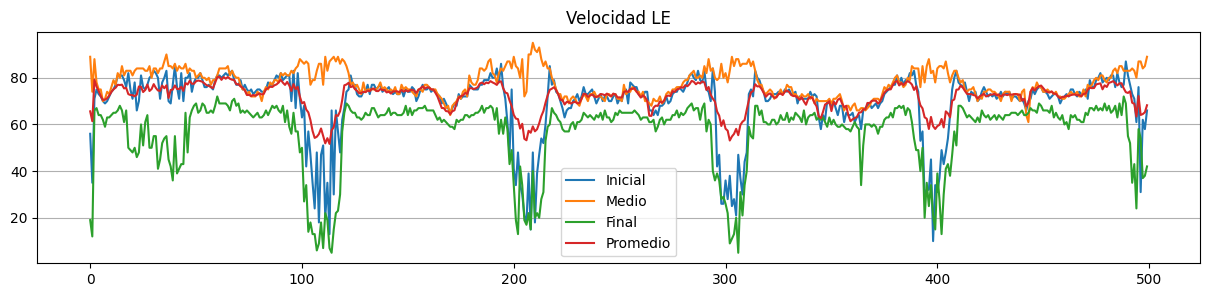

137 series en el grupo Intensidad nn
6640 6941 7015
sInicial: [  64  113  568  996 1460 1551 1821 1928 1712 1423]
sMedio: [ 20  16  48 144 188 316 344 316 296 276]
sFinal: [ 36  24 156 308 460 583 648 720 524 548]
sProm: [ 104.35766423  100.89781022  380.72262774  761.9270073  1012.60583942
 1147.70072993 1190.2919708  1159.16058394 1083.24087591  967.09489051]


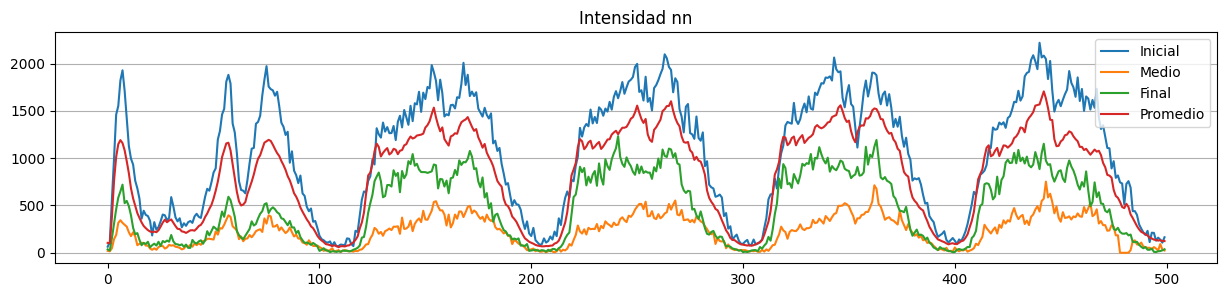

137 series en el grupo Ocupacion nn
6640 6941 7015
sInicial: [ 0  0  1  3  7  8  9 10  8  8]
sMedio: [0 0 0 1 1 3 3 2 3 2]
sFinal: [1 0 1 2 4 6 7 7 5 6]
sProm: [0.74452555 0.54744526 1.2189781  3.16058394 5.25547445 6.48175182
 6.62043796 7.48905109 6.81751825 5.46715328]


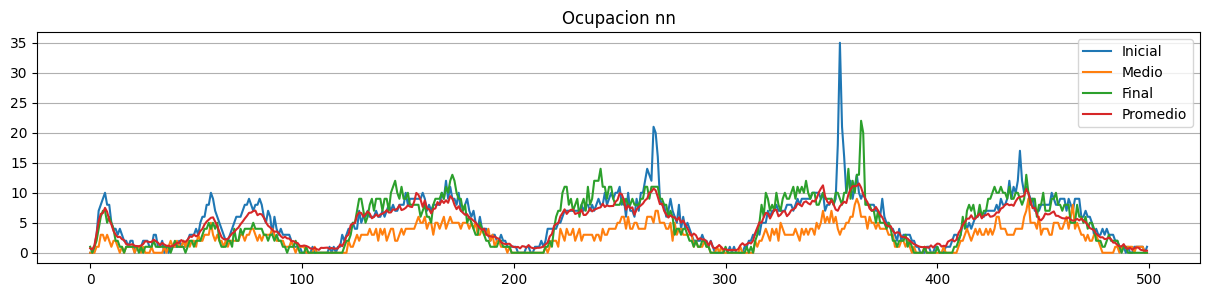

137 series en el grupo Carga nn
6640 6941 7015
sInicial: [ 4  5 25 45 65 67 80 84 76 63]
sMedio: [ 2  0  3 10 12 20 21 20 18 18]
sFinal: [ 4  1 11 21 31 37 42 47 35 35]
sProm: [ 4.64963504  4.11678832 14.22627737 27.60583942 36.51094891 41.54744526
 42.84671533 42.59124088 39.81021898 35.35766423]


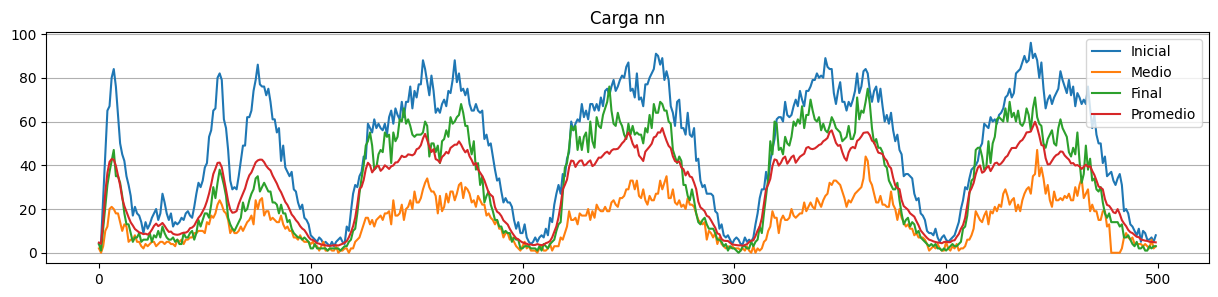

137 series en el grupo Velocidad nn
6640 6941 7015
sInicial: [40 55 76 71 67 67 64 65 65 68]
sMedio: [22 17 41 60 70 67 65 67 67 67]
sFinal: [23 21 62 52 60 56 57 56 59 58]
sProm: [51.59124088 48.5620438  71.01459854 72.71532847 70.87591241 69.76642336
 68.78832117 67.5620438  67.95620438 69.24817518]


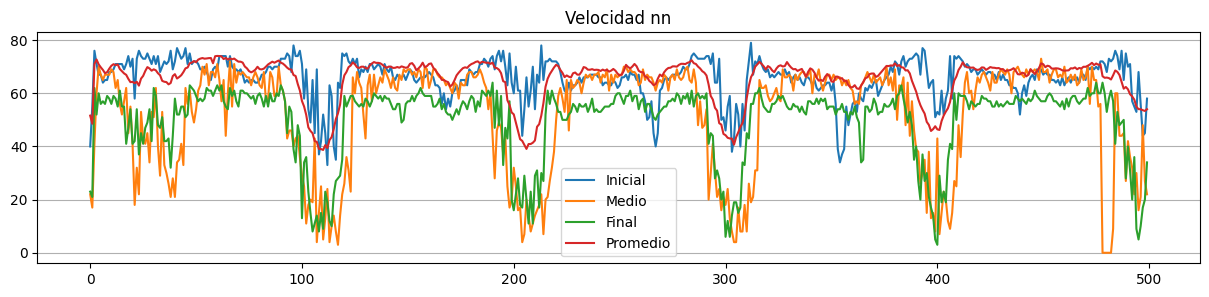

In [36]:
cont = 0
pref = ["TI", "LI", "TE", "LE", "nn"]
for lids in ids_PM_full:
    graficaMetodoSeriePromedio(grillaIntensidad, lids, "Intensidad " + pref[cont], 500)
    graficaMetodoSeriePromedio(grillaOcupacion, lids, "Ocupacion " + pref[cont], 500)
    graficaMetodoSeriePromedio(grillaCarga, lids, "Carga " + pref[cont], 500)
    graficaMetodoSeriePromedio(grillaVelocidad, lids, "Velocidad " + pref[cont], 500)
    cont += 1

In [37]:
# Prueba de separación de dia/noche
ids = ids_PM_full[0][0]
print("id:", ids)
pos = dicc_posID[ids]
print("pos:", pos)
tope = grillaIntensidad.shape[1]
print("tope:", tope)
valoresDia = []
valoresNoche = []
i = 0
while i < tope:
    fecha = lista_Fechas[i]
    if fecha in dicc_posFecha:
        posf = dicc_posFecha[fecha]
        hh = int(fecha[11:13])
        if hh >= 22 or hh < 7:
            valoresNoche.append(grillaIntensidad[pos][i])
            valoresDia.append(-1)
        elif hh >= 7 and hh < 22:
            valoresDia.append(grillaIntensidad[pos][i])
            valoresNoche.append(-1)
        else:
            print("error!")
    i += 1
print(i)
print(valoresDia[:20])
print(valoresNoche[:20])
print(grillaIntensidad[pos][:20])

corrigeDatos(valoresDia)
corrigeDatos(valoresNoche)

id: 6641
pos: 55
tope: 35117
35117
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[np.int64(190), np.int64(156), np.int64(912), np.int64(1784), np.int64(2981), np.int64(3240), np.int64(3192), np.int64(3169), np.int64(2668), np.int64(2488), np.int64(2056), np.int64(1892), np.int64(1372), np.int64(1139), np.int64(981), np.int64(721), np.int64(692), np.int64(563), np.int64(544), np.int64(552)]
[ 190  156  912 1784 2981 3240 3192 3169 2668 2488 2056 1892 1372 1139
  981  721  692  563  544  552]


[np.int64(190),
 np.int64(156),
 np.int64(912),
 np.int64(1784),
 np.int64(2981),
 np.int64(3240),
 np.int64(3192),
 np.int64(3169),
 np.int64(2668),
 np.int64(2488),
 np.int64(2056),
 np.int64(1892),
 np.int64(1372),
 np.int64(1139),
 np.int64(981),
 np.int64(721),
 np.int64(692),
 np.int64(563),
 np.int64(544),
 np.int64(552),
 np.int64(432),
 np.int64(520),
 np.int64(404),
 np.int64(524),
 np.int64(513),
 np.int64(496),
 np.int64(581),
 np.int64(767),
 780,
 794,
 807,
 821,
 834,
 848,
 861,
 875,
 888,
 902,
 915,
 929,
 942,
 956,
 969,
 983,
 996,
 1010,
 1023,
 1037,
 1051,
 1064,
 1078,
 1091,
 1105,
 1118,
 1132,
 1145,
 1159,
 1172,
 1186,
 1199,
 1213,
 1226,
 1240,
 1253,
 1267,
 1280,
 1294,
 1307,
 1321,
 1335,
 1348,
 1362,
 1375,
 1389,
 1402,
 1416,
 1429,
 1443,
 1456,
 1470,
 1483,
 1497,
 1510,
 1524,
 1537,
 1551,
 1564,
 1578,
 np.int64(1592),
 np.int64(1768),
 np.int64(1380),
 np.int64(1417),
 np.int64(1084),
 np.int64(984),
 np.int64(877),
 np.int64(872),
 np.i

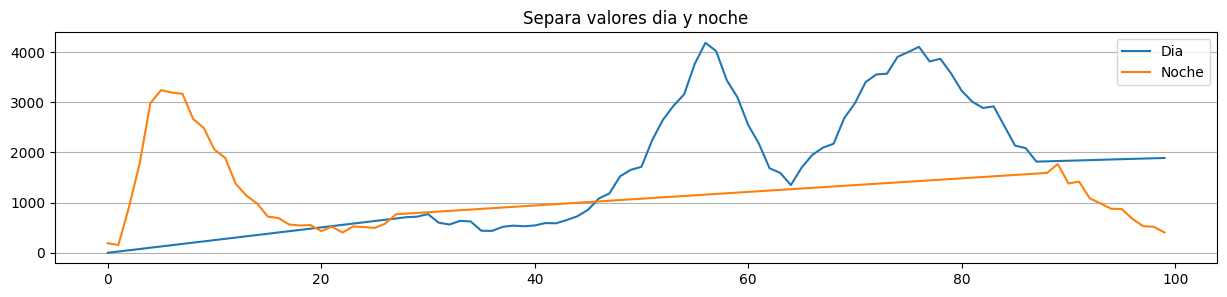

In [38]:
# Graficando
plt.figure(figsize=(15,3))
plt.plot(valoresDia[:100], label="Dia")
plt.plot(valoresNoche[:100], label="Noche")
#plt.plot(grillaIntensidad[pos][:100], label="Todos")
plt.title("Separa valores dia y noche")
#plt.savefig('histograma_2024_vecinos_x_distancia.png', bbox_inches='tight')
plt.grid(axis='y')
#plt.yscale('log')
plt.legend()
plt.show()
plt.close()

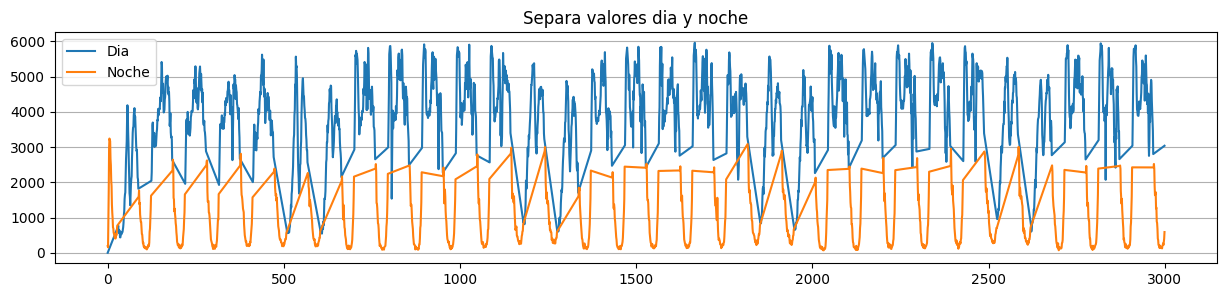

In [39]:
# Graficando
plt.figure(figsize=(15,3))
plt.plot(valoresDia[:3000], label="Dia")
plt.plot(valoresNoche[:3000], label="Noche")
#plt.plot(grillaIntensidad[pos][:500], label="Todos")
plt.title("Separa valores dia y noche")
#plt.savefig('histograma_2024_vecinos_x_distancia.png', bbox_inches='tight')
plt.grid(axis='y')
#plt.yscale('log')
plt.legend()
plt.show()
plt.close()

In [40]:
l = [5,3]
if 4 < max(l):
    print("si")
    l = [min(l),4]
    print(l)
else:
    print("no")

si
[3, 4]


In [41]:
# Generando lista de vecindad de los dos vecinos más cercanos para los 5 grupos
dicc2vecinosmasproximos = {}
for x in range(cantSensFinal):
    idX = list_IDs_final[x]
    dosmascerca = []
    for y in range(cantSensFinal):
        dxy = matrizDistancia[x][y]
        if dxy > 0:
            if len(dosmascerca) < 2:
                dosmascerca.append(dxy)
            else:
                if dxy < max(dosmascerca):
                    dosmascerca = [min(dosmascerca),dxy]
    idsvecinostemp = []
    for y in range(cantSensFinal):
        if matrizDistancia[x][y] == dosmascerca[0] or matrizDistancia[x][y] == dosmascerca[1]:
            idsvecinostemp.append(int(list_IDs_final[y]))
    dicc2vecinosmasproximos[idX] = idsvecinostemp
    if len(idsvecinostemp) > 2:
        print("Warning! lista con", len(idsvecinostemp), "elementos.")
print("Sensores con los 2 vecinos más cerca:", len(dicc2vecinosmasproximos))
exportarArchivoVecinos(dicc2vecinosmasproximos, "m30_2024_listaVecindad_2mascercanos.txt")

Sensores con los 2 vecinos más cerca: 241
Archivo m30_2024_listaVecindad_2mascercanos.txt escrito correctamente.


In [42]:
# Generando lista de vecindad de los dos vecinos más cercanos para 4 de los 5 grupos
dicc2vecinosmasproximos = {}
for x in range(cantSensFinal):
    idX = list_IDs_final[x]
    if idX not in ids_PM_nn:
        dosmascerca = []
        for y in range(cantSensFinal):
            dxy = matrizDistancia[x][y]
            if dxy > 0:
                if len(dosmascerca) < 2:
                    dosmascerca.append(dxy)
                else:
                    if dxy < max(dosmascerca):
                        dosmascerca = [min(dosmascerca),dxy]
        idsvecinostemp = []
        for y in range(cantSensFinal):
            if matrizDistancia[x][y] == dosmascerca[0] or matrizDistancia[x][y] == dosmascerca[1]:
                idsvecinostemp.append(int(list_IDs_final[y]))
        dicc2vecinosmasproximos[idX] = idsvecinostemp
        if len(idsvecinostemp) > 2:
            print("Warning! lista con", len(idsvecinostemp), "elementos.")
print("Sensores con los 2 vecinos más cerca sin el último grupo:", len(dicc2vecinosmasproximos))
exportarArchivoVecinos(dicc2vecinosmasproximos, "m30_2024_listaVecindad_2mascercanos_4de5.txt")

Sensores con los 2 vecinos más cerca sin el último grupo: 104
Archivo m30_2024_listaVecindad_2mascercanos_4de5.txt escrito correctamente.


In [43]:
def ZETA(listX, listY):
	numeradorCORT = float(0)
	denCORTFactorX = float(0)
	denCORTFactorY = float(0)
	auxDiffX = int(0)
	auxDiffY = int(0)
	accVolX = float(listX[0])
	accVolY = float(listX[0])
	#print(listX)
	#print(listY)
	for i in range(1,len(listX)):
		auxDiffX = listX[i] - listX[i-1]
		auxDiffY = listY[i] - listY[i-1]
		numeradorCORT += (auxDiffX*auxDiffY)
		denCORTFactorX += (auxDiffX*auxDiffX)
		denCORTFactorY += (auxDiffY*auxDiffY)
		#print(i,auxDiffX,auxDiffY,numeradorCORT,denCORTFactorX,denCORTFactorY)
		accVolX += listX[i]
		accVolY += listY[i]
	#print(denCORTFactorX, denCORTFactorY)
	denominadorCORT = math.sqrt(denCORTFactorX) * math.sqrt(denCORTFactorY)
	CORT = numeradorCORT / denominadorCORT
	PHI = 2 / (1 + math.exp(2*CORT))
	ZETA = PHI * (accVolX - accVolY)
	return ZETA

In [44]:
def CORT(listX, listY):
	numeradorCORT = float(0)
	denCORTFactorX = float(0)
	denCORTFactorY = float(0)
	auxDiffX = int(0)
	auxDiffY = int(0)
	accVolX = float(listX[0])
	accVolY = float(listX[0])
	#print(listX)
	#print(listY)
	for i in range(1,len(listX)):
		auxDiffX = listX[i] - listX[i-1]
		auxDiffY = listY[i] - listY[i-1]
		numeradorCORT += (auxDiffX*auxDiffY)
		denCORTFactorX += (auxDiffX*auxDiffX)
		denCORTFactorY += (auxDiffY*auxDiffY)
		#print(i,auxDiffX,auxDiffY,numeradorCORT,denCORTFactorX,denCORTFactorY)
		accVolX += listX[i]
		accVolY += listY[i]
	#print(denCORTFactorX, denCORTFactorY)
	denominadorCORT = math.sqrt(denCORTFactorX) * math.sqrt(denCORTFactorY)
	CORT = numeradorCORT / denominadorCORT
	return CORT

In [49]:
listA = [1,2,3,4,5,6,7,8,9]
listB = [11,12,13,14,15,16,17,18,19]
listC = [9,8,7,6,5,4,3,2,1]
listD = [4,4,4,4,5,6,7,8,9]
listE = [1,2,3,4,5,5,5,5,5]
listF = [1,2,2,4,9,6,7,8,9]
listG = [101,2,3,4,5,6,7,8,9]
listH = [1,2,3,4,5,6,7,8,90]
alllistsTestZeta = [listA,listB,listC,listD,listE,listF,listG, listH]

In [50]:
print("******************ZETA******************")
print("listA\tlistB\tlistC\tlistD\tlistE\tlistF\tlistG\tlistH")
for l1 in alllistsTestZeta:
    for l2 in alllistsTestZeta:
        if l1 == l2:
            print("---", end="\t")
            #print("---")
        else:
            print(round(ZETA(l1,l2),2), end="\t")
            #print(ZETA(l1,l2))
    print("")

******************ZETA******************
listA	listB	listC	listD	listE	listF	listG	listH
---	-19.07	14.09	-1.02	3.91	-1.77	0.0	-51.37	
19.07	---	155.02	26.28	35.2	45.38	105.37	-0.63	
-14.09	-155.02	---	-18.25	3.22	-15.52	-5.46	-121.55	
1.02	-26.28	18.25	---	10.14	0.0	2.93	-43.9	
-3.91	-35.2	-3.22	-10.14	---	-5.86	-14.5	-88.78	
1.77	-45.38	15.52	0.0	5.86	---	3.43	-65.06	
0.0	-105.37	5.46	-2.93	14.5	-3.43	---	-81.11	
51.37	0.63	121.55	43.9	88.78	65.06	81.11	---	


In [51]:
print("******************CORT******************")
print("listA\tlistB\tlistC\tlistD\tlistE\tlistF\tlistG\tlistH")
for l1 in alllistsTestZeta:
    for l2 in alllistsTestZeta:
        if l1 == l2:
            print("---", end="\t")
            #print("---")
        else:
            print(round(CORT(l1,l2),1), end="\t")
            #print(ZETA(l1,l2))
    print("")

******************CORT******************
listA	listB	listC	listD	listE	listF	listG	listH
---	1.0	-1.0	0.8	0.7	0.4	-0.3	0.4	
1.0	---	-1.0	0.8	0.7	0.4	-0.3	0.4	
-1.0	-1.0	---	-0.8	-0.7	-0.4	0.3	-0.4	
0.8	0.8	-0.8	---	0.2	0.3	0.0	0.5	
0.7	0.7	-0.7	0.2	---	0.6	-0.5	0.0	
0.4	0.4	-0.4	0.3	0.6	---	-0.1	0.2	
-0.3	-0.3	0.3	0.0	-0.5	-0.1	---	-0.0	
0.4	0.4	-0.4	0.5	0.0	0.2	-0.0	---	


In [48]:
for i in range(5):
    print(lista_Fechas[i])
for i in range(5):
    print(lista_Fechas[-i])

2024-01-01 00:00:00
2024-01-01 00:15:00
2024-01-01 00:30:00
2024-01-01 00:45:00
2024-01-01 01:00:00
2024-01-01 00:00:00
2024-12-31 23:45:00
2024-12-31 23:30:00
2024-12-31 23:15:00
2024-12-31 23:00:00
